# Coding Block 3 - Interpretability with SHAP

### Load the packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
import shap
'''
...
'''

/Users/chrisoesterreich/Developement/anaconda3/envs/donnerstag/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\n...\n'

### Read the dataset 
You can also compare processed and non-processed data.

In [9]:
data= pd.read_csv('../data/df_imputed_clean.csv')
data = data.drop(columns=['Mahalanobis_Distance', 'Multivariate_Outlier', 'Outlier', 'Unnamed: 0'])

### Copy the code from your last successful classifiers (RF, XGBoost, ...)

In [10]:
def create_model(data, model_type="xgboost"):
    """
    Create and train ML models on the given dataset
    
    Parameters:
    -----------
    data : DataFrame
        The dataset containing features and target variable
    model_type : str
        The type of model to create (default: "xgboost")
        
    Returns:
    --------
    dict
        Dictionary containing the trained model, X and y data, and train/test splits
    """
    # Separate features and target
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train model based on type
    if model_type == "random_forest":
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
    elif model_type == "xgboost":
        model = xgb.XGBClassifier(random_state=42)
        model.fit(X_train, y_train)
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_type.title()} Model Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Return model and data
    return {
        "model": model,
        "X": X,
        "y": y,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

### Create a SHAP summary plot that provides an overview of the average feature importance

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_132459"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       4.13 GB / 16.00 GB (25.8%)
Disk Space Avail:   15.09 GB / 460.43 GB (3.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. R

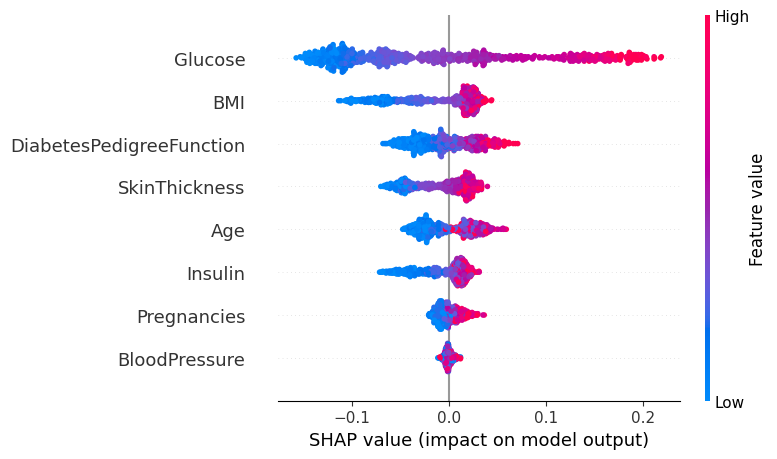

In [11]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# Load the dataset (Assuming 'data' is already defined)
# data = pd.read_csv("your_dataset.csv")

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train AutoGluon model
predictor = TabularPredictor(label='Outcome').fit(train_data)

# Get the best model
best_model_name = predictor._trainer.model_best
model = predictor._trainer.load_model(best_model_name)

# Prepare SHAP explainer
explainer = shap.Explainer(model.predict_proba, X)
shap_values = explainer(X)

# Create SHAP summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X)
plt.show()

### Create SHAP waterfall plots that describe the model prediction for one or two individuals from the test dataset

No path specified. Models will be saved in: "AutogluonModels/ag-20250320_132654"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.2.0: Fri Dec  6 19:01:59 PST 2024; root:xnu-11215.61.5~2/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       4.16 GB / 16.00 GB (26.0%)
Disk Space Avail:   15.07 GB / 460.43 GB (3.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. R

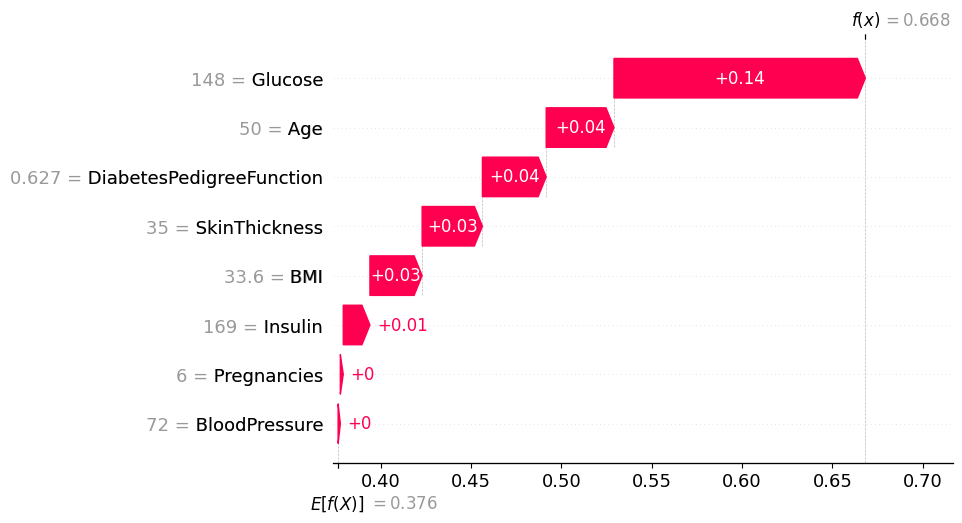

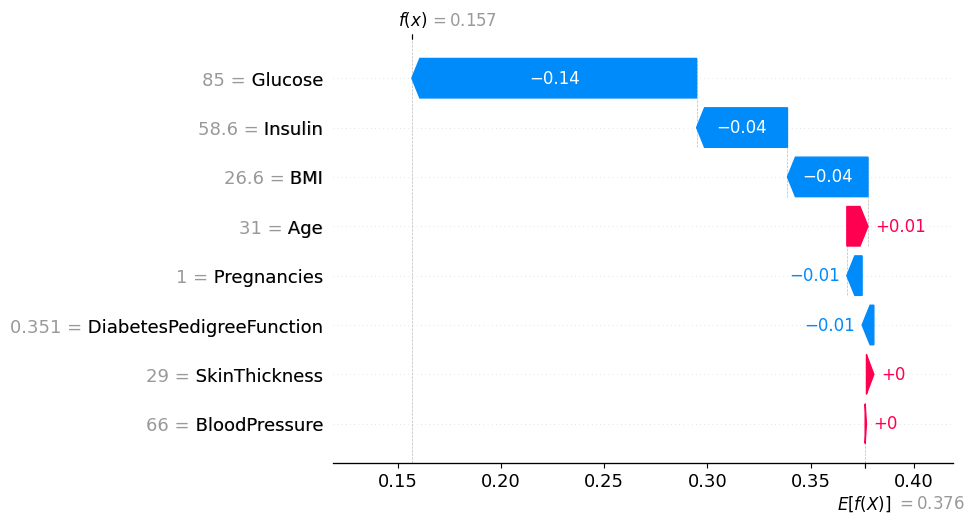

In [12]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# Load the dataset (Assuming 'data' is already defined)
# data = pd.read_csv("your_dataset.csv")

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Train AutoGluon model
predictor = TabularPredictor(label='Outcome').fit(train_data)

# Get the best model
best_model_name = predictor._trainer.model_best
model = predictor._trainer.load_model(best_model_name)

# Prepare SHAP explainer
explainer = shap.Explainer(model.predict_proba, X)
shap_values = explainer(X)

# Select individuals from test dataset for SHAP waterfall plots
individual_indices = [0, 1]  # Adjust indices as needed
for idx in individual_indices:
    plt.figure(figsize=(8, 5))
    shap.waterfall_plot(shap_values[idx])
    plt.show()
